In [1]:
# 영화리뷰를 사용한 텍스트분류

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import json
import os

In [2]:
# 데이터 불러오기

# 네이버 영화 감성분석 데이터 다운로드

!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
Updating files:  13% (1996/14737)
Updating files:  14% (2064/14737)
Updating files:  15% (2211/14737)
Updating files:  16% (2358/14737)
Updating files:  17% (2506/14737)
Updating files:  18% (2653/14737)
Updating files:  19% (2801/14737)
Updating files:  20% (2948/14737)
Updating files:  21% (3095/14737)
Updating files:  22% (3243/14737)
Updating files:  23% (3390/14737)
Updating files:  24% (3537/14737)
Updating files:  25% (3685/14737)
Updating files:  26% (3832/14737)
Updating files:  27% (3979/14737)
Updating files:  28% (4127/14737)
Updating files:  29% (4274/14737)
Updating files:  30% (4422/14737)
Updating files:  31% (4569/14737)
Updating files:  32% (4716/14737)
Updating files:  32% (4750/14737)
Updating files:  33% (4864/14737)
Updating files:  34% (5011/14737)
Updating files:  35% (5158/14737)
Updating files:  36% (5306/14737)
Updating files:  37% (5453/14737)
Updating files:  38% (5601/14737)
Updating files:  39% (5748/14737)
Updating files:  40% (589

In [4]:
os.listdir('nsmc')

['.git',
 'code',
 'ratings.txt',
 'ratings_test.txt',
 'ratings_train.txt',
 'raw',
 'README.md',
 'synopses.json']

In [7]:
train = pd.read_table('nsmc/ratings_train.txt')
test = pd.read_table('nsmc/ratings_test.txt')

In [8]:
print(f'훈련 샘플 : {len(train)}, 검증 샘플 : {len(test)}')

훈련 샘플 : 150000, 검증 샘플 : 50000


In [9]:
# 데이터 분석

train[50:70]
# label >> 이진 분류 (0,1)

,id,document,label
50,9063648,영화가 사람의 영혼을 어루만져 줄 수도 있군요 거친 세상사를 잠시 잊고 동화같은 영...,1
51,8272095,야 세르게이! 작은고추의 매운맛을 보여주마! 포퐁저그 콩진호가 간다,0
52,2345905,이렇게 가슴시리게 본 드라마가 또 있을까? 감동 그 자체!,1
53,7865630,"난또 저 꼬마애가 무슨 원한이 깊길래.,. 했더니 OO 그냥 혼자 나대다 OO걸 어...",0
54,7207064,재미있어요,1
55,5719655,전 좋아요,1
56,1651126,최고,0
57,7246040,너무 충격적이엇다. 기분을 완전히 푹 꺼지게 하는 느낌... 활력이라고는 하나도 없...,1
58,717775,심심한영화.,0
59,8317483,백봉기 언제나오나요?,1


In [10]:
train_data = train['document']
train_labels = train['label']

test_data = test['document']
test_labels = test['label']

In [11]:
# 데이터 전처리

# 1) 토큰화(tokenizing)

def tokenizing(sentence) :
    if isinstance(sentence, str) :
        sentence = sentence.split() # 공백기준으로 자르기
    
    else :
        sentence = '' # 노이즈 데이터 처리
    
    return sentence

In [12]:
train_data_list = train_data.apply(tokenizing)
train_data_list

0                                 [아, 더빙.., 진짜, 짜증나네요, 목소리]
1                    [흠...포스터보고, 초딩영화줄....오버연기조차, 가볍지, 않구나]
2                                       [너무재밓었다그래서보는것을추천한다]
3                      [교도소, 이야기구먼, ..솔직히, 재미는, 없다..평점, 조정]
4         [사이몬페그의, 익살스런, 연기가, 돋보였던, 영화!스파이더맨에서, 늙어보이기만, ...
                                ...                        
149995                             [인간이, 문제지.., 소는, 뭔죄인가..]
149996                                    [평점이, 너무, 낮아서...]
149997              [이게, 뭐요?, 한국인은, 거들먹거리고, 필리핀, 혼혈은, 착하다?]
149998                   [청춘, 영화의, 최고봉.방황과, 우울했던, 날들의, 자화상]
149999                     [한국, 영화, 최초로, 수간하는, 내용이, 담긴, 영화]
Name: document, Length: 150000, dtype: object

In [14]:
test_data_list = test_data.apply(tokenizing)
test_data_list

0                                                   [굳, ㅋ]
1                                   [GDNTOPCLASSINTHECLUB]
2         [뭐야, 이, 평점들은...., 나쁘진, 않지만, 10점, 짜리는, 더더욱, 아니잖아]
3                  [지루하지는, 않은데, 완전, 막장임..., 돈주고, 보기에는....]
4        [3D만, 아니었어도, 별, 다섯, 개, 줬을텐데.., 왜, 3D로, 나와서, 제,...
                               ...                        
49995    [오랜만에, 평점, 로긴했네ㅋㅋ, 킹왕짱, 쌈뽕한, 영화를, 만났습니다, 강렬하게,...
49996    [의지, 박약들이나, 하는거다, 탈영은, 일단, 주인공, 김대희, 닮았고, 이등병,...
49997          [그림도, 좋고, 완성도도, 높았지만..., 보는, 내내, 불안하게, 만든다]
49998    [절대, 봐서는, 안, 될, 영화.., 재미도, 없고, 기분만, 잡치고.., 한, ...
49999                                       [마무리는, 또, 왜이래]
Name: document, Length: 50000, dtype: object

In [15]:
# 토크나이저(tokenizer)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data_list)

In [18]:
# 2) 정수 인코딩(Integer Encoding)

# 문장 >> 시퀀스 변환

train_data_idx = tokenizer.texts_to_sequences(train_data_list)
test_data_idx = tokenizer.texts_to_sequences(test_data_list)

In [20]:
train_data_idx[0]

[50, 42604, 4, 10484, 1064]

In [22]:
print(len(train_data_idx[0]))
print(len(train_data_idx[2]))

# 문장의 길이가 각각 다르다. >> padding을 하여 맞춰준다!

5
1


In [23]:
# 3) 문장 패딩(padding)

train_data_padded = pad_sequences(train_data_idx, value=0, padding='post', maxlen = 50)
test_data_padded = pad_sequences(test_data_idx, value=0, padding='post', maxlen = 50)

# 앞쪽에 padding 하고싶으면 padding='pre'로 설정

In [24]:
train_data_padded

array([[    50,  42604,      4, ...,      0,      0,      0],
       [ 73045,  73046,   6403, ...,      0,      0,      0],
       [ 73047,      0,      0, ...,      0,      0,      0],
       ...,
       [    33, 357310,  22473, ...,      0,      0,      0],
       [  3925,     78, 357314, ...,      0,      0,      0],
       [   200,      1,   3642, ...,      0,      0,      0]])

In [25]:
print(train_data_padded[0].shape)
print(train_data_padded[0])
print()
print(test_data_padded)

(50,)
[   50 42604     4 10484  1064     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]

[[  923    59     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [  592     5  4190 ...     0     0     0]
 ...
 [ 8570   205 13145 ...     0     0     0]
 [  171  8700    68 ...     0     0     0]
 [12530    49  2530 ...     0     0     0]]


In [35]:
# 4) 모델링

# 입력 크기는 영화리뷰 데이터 셋에서 적용된 어휘 사전의 크기입니다.
# (10000개의 단어)

vocab_size = 10000

model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(50,))) # 벡터화
# vocab_size : 단어 크기, 16 : 원하는 벡터의 길이(차원)
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid')) # 이진분류

In [36]:
# 5) 모델 학습

# 환경설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 학습
history = model.fit(train_data_padded, train_labels, epochs = 50, batch_size = 100)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5218 - accuracy: 0.7146
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4270 - accuracy: 0.7804
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4137 - accuracy: 0.7880
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4076 - accuracy: 0.7897
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.7916
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4018 - accuracy: 0.7917
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3994 - accuracy: 0.7933
Epoch 8/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.7939
Epoch 9/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3939 - accuracy: 0.7946
Epoch 10/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.389

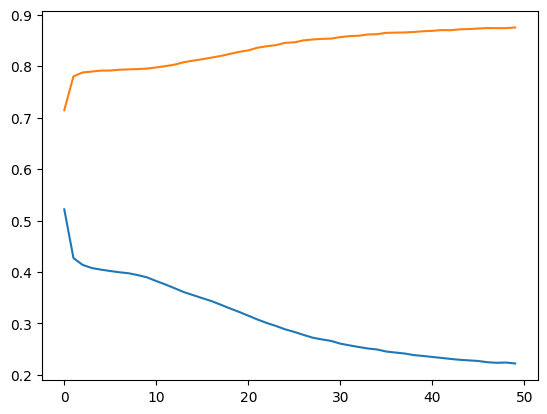

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [38]:
result = model.evaluate(test_data_padded, test_labels, verbose=2)
print(result)

1563/1563 - 2s - loss: 1.1976 - accuracy: 0.7373 - 2s/epoch - 1ms/step
[1.1975536346435547, 0.7372999787330627]


In [49]:
# 모델 적용 >> 추론

# 추론할 리뷰 문장
sentence = '오늘은 기분이 좋아요'

# 토큰화
sentence = sentence.split()

# 정수화
sentence_idx = tokenizer.texts_to_sequences([sentence])

# 패딩

sentence_padded = pad_sequences(sentence_idx, value = 0, padding = 'post', maxlen = 50)


In [50]:
sentence_padded

array([[6131,  792,  535,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])

In [51]:
result = model.predict(sentence_padded)
if result > 0.5 :
    print(f'긍정 댓글입니다. 확률 : {result[0][0]:.2f}')

else : 
    print(f'부정 댓글입니다. 확률 : {result[0][0]:.2f}')

1/1 [==============================] - 0s 13ms/step
긍정 댓글입니다. 확률 : 1.00


감성 분류 with RNN

In [52]:
# 1. 모델링 (RNN)

model = tf.keras.Sequential([
    # 임베딩 레이어(embedding layer)
    tf.keras.layers.Embedding(vocab_size, 64),
    
    # RNN layer
    tf.keras.layers.SimpleRNN(16),
    
    # Dense layer
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])



In [53]:
# 2. 학습
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(train_data_padded, train_labels, validation_split=0.2, epochs = 20, batch_size = 100)

Epoch 1/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.6043 - accuracy: 0.6618 - val_loss: 0.5345 - val_accuracy: 0.7206
Epoch 2/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.4855 - accuracy: 0.7550 - val_loss: 0.4911 - val_accuracy: 0.7499
Epoch 3/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.4232 - accuracy: 0.7904 - val_loss: 0.4781 - val_accuracy: 0.7528
Epoch 4/20
1200/1200 [==============================] - 24s 20ms/step - loss: 0.3796 - accuracy: 0.8088 - val_loss: 0.4961 - val_accuracy: 0.7523
Epoch 5/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.3529 - accuracy: 0.8209 - val_loss: 0.5207 - val_accuracy: 0.7538
Epoch 6/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.3223 - accuracy: 0.8363 - val_loss: 0.5496 - val_accuracy: 0.7512
Epoch 7/20
1200/1200 [==============================] - 23s 19ms/step - loss: 0.3104 - accuracy: 0.8400 - val_loss: 0.5639 -

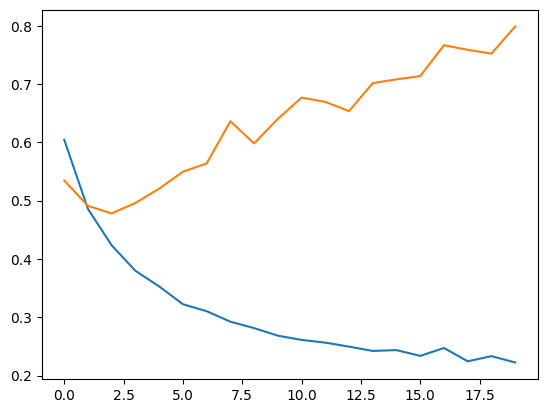

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


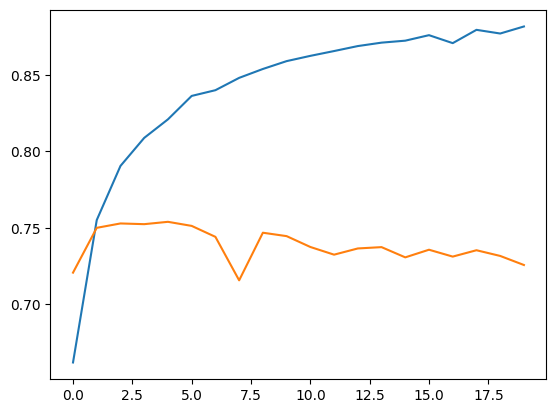

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [57]:
# 3. 모델 성능 평가

result = model.evaluate(test_data_padded, test_labels, verbose = 2)
print(result)

1563/1563 - 6s - loss: 0.8097 - accuracy: 0.7147 - 6s/epoch - 4ms/step
[0.8096522092819214, 0.7146599888801575]


In [58]:
# 4. 추론 (모델 적용)

# 추론할 댓글 문장
sentence = '이 영화 정말 재미없어요.'

# 토큰화
sentence = sentence.split()

# 정수 인코딩
sentence_idx = tokenizer.texts_to_sequences([sentence])

# 패딩
sentence_padded = pad_sequences(sentence_idx, value = 0, padding = 'post', maxlen = 50)

In [63]:
result = model.predict(sentence_padded)
if result > 0.5 :
    print(f'긍정 댓글입니다. 확률 : {result[0][0]*100:.2f}%')

else : 
    print(f'부정 댓글입니다. 확률 : {result[0][0]*100:.2f}%')

1/1 [==============================] - 0s 15ms/step
부정 댓글입니다. 확률 : 0.19%
